Topic networking, centrality analysis, cluster analysis

In [79]:
import pandas as pd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities


In [10]:
df = pd.read_json('/Users/trevor/Desktop/Research/climate-trends/unique_english_abstract_not_null_bertopic_embeddings.json')

In [11]:
df.columns

Index(['indexed', 'reference-count', 'publisher', 'issue', 'license',
       'content-domain', 'short-container-title', 'published-print', 'DOI',
       'type', 'created', 'page', 'source', 'is-referenced-by-count', 'title',
       'prefix', 'volume', 'author', 'member', 'published-online', 'reference',
       'container-title', 'language', 'link', 'deposited', 'score', 'resource',
       'issued', 'references-count', 'journal-issue', 'alternative-id', 'URL',
       'ISSN', 'issn-type', 'published', 'abstract', 'original-title',
       'archive', 'update-policy', 'assertion', 'relation', 'subtitle',
       'published-other', 'special_numbering', 'update-to', 'editor', 'funder',
       'issue-title', 'article-number', 'updated-by', 'accepted',
       'earliest_pub_year', 'cleaned_abstract', 'chair', 'translator',
       'clinical-trial-number', 'topic', 'probability', 'Name', 'embedding'],
      dtype='object')

In [13]:
doi_to_topic_dict = {}

for _, row in df.iterrows():
    doi_to_topic_dict[row['DOI']] = row['Name']

In [15]:
doi_to_topic_dict 

{'10.1175/jcli-d-12-00476.1': '227_tcr_ecs_forcing_tcre',
 '10.3390/cli1010004': '-1_climate_change_climate change_model',
 '10.1002/wcc.211': '-1_climate_change_climate change_model',
 '10.1175/jcli-d-12-00222.1': '-1_climate_change_climate change_model',
 '10.3390/cli1020074': '157_article_doi_https_com',
 '10.3390/cli1020076': '-1_climate_change_climate change_model',
 '10.1175/jcli-d-12-00534.1': '-1_climate_change_climate change_model',
 '10.12688/f1000research.2-13.v1': '17_elevated_elevated co2_co2_leaf',
 '10.1175/jcli-d-12-00535.1': '332_cmip5_cmip3_twenty first_twenty first century',
 '10.1175/jcli-d-11-00682.1': '-1_climate_change_climate change_model',
 '10.1002/2013gl057467': '-1_climate_change_climate change_model',
 '10.2478/quageo-2013-0008': '-1_climate_change_climate change_model',
 '10.1002/2013eo330012': '-1_climate_change_climate change_model',
 '10.5194/acp-13-10081-2013': '-1_climate_change_climate change_model',
 '10.1002/2013eo340003': '-1_climate_change_climat

In [3]:
df['reference'][10100]

[{'volume-title': 'Redesigning the Future: Systems Approach to Societal Problems',
  'year': '1974',
  'author': 'Ackoff R L',
  'key': 'bibr1-c12172'},
 {'doi-asserted-by': 'publisher',
  'key': 'bibr2-c12172',
  'DOI': '10.1016/j.cosust.2010.12.017'},
 {'key': 'bibr3-c12172',
  'doi-asserted-by': 'crossref',
  'first-page': '15',
  'DOI': '10.7551/mitpress/6294.003.0004',
  'volume-title': 'Social Dynamics',
  'author': 'Blume L E',
  'year': '2001'},
 {'volume-title': 'Adapting Institutions: Governance, Complexity and Social–Ecological Resilience',
  'year': '2012',
  'author': 'Boyd E.',
  'key': 'bibr4-c12172'},
 {'doi-asserted-by': 'publisher',
  'key': 'bibr5-c12172',
  'DOI': '10.1146/annurev-environ-072809-101747'},
 {'doi-asserted-by': 'publisher',
  'key': 'bibr6-c12172',
  'DOI': '10.1080/0964401042000310178'},
 {'doi-asserted-by': 'publisher',
  'key': 'bibr7-c12172',
  'DOI': '10.1111/j.1475-5661.2012.00535.x'},
 {'volume-title': 'Cities and Low Carbon Transitions',
  'ye

In [6]:
def flatten_dicts(list_of_dicts):
    out_dict = {}
    for dictionary in list_of_dicts:
        out_dict = {**out_dict, **dictionary}
    return out_dict


def extract_dois(row, out_dict):
    list_of_dicts = row['reference']
    orig_paper = row['DOI']
    if list_of_dicts is not None:
        for dictionary in list_of_dicts:
            if (not isinstance(dictionary, dict)) and (dictionary is not None):
                dictionary = flatten_dicts(dictionary)
            if isinstance(dictionary, dict) and (orig_paper is not None):
                doi = dictionary.get('DOI')
                if doi is not None:
                    if doi in out_dict:
                        out_dict[doi].append(orig_paper)
                    else:
                        out_dict[doi] = [orig_paper]
            else:
                print("Not a dictionary, ", "but a ", type(dictionary), " ", dictionary)
    return out_dict
        

In [7]:
output_dict = {}
for _, row in df.iterrows(): 
    doi_dict = extract_dois(row, output_dict)

In [8]:
doi_dict

{'10.1038/nature08019': ['10.1038/nclimate2060',
  '10.1175/jcli-d-12-00476.1',
  '10.1038/nclimate1806',
  '10.1002/wcc.237',
  '10.1080/14693062.2013.823308',
  '10.1038/nclimate2059',
  '10.1038/nclimate1793',
  '10.1038/nclimate1804',
  '10.1038/nclimate2034',
  '10.1016/j.egypro.2013.06.623',
  '10.1038/nature12406',
  '10.1016/j.susc.2012.11.014',
  '10.1039/c3cp51101d',
  '10.1126/science.1232468',
  '10.1016/j.eneco.2013.04.008',
  '10.3390/su5051944',
  '10.1186/1750-0680-8-5',
  '10.1175/jcli-d-12-00285.1',
  '10.1016/j.jembe.2012.11.019',
  '10.1016/j.jeem.2012.12.004',
  '10.1038/nature12269',
  '10.1016/j.eneco.2013.09.022',
  '10.1016/j.egypro.2013.06.694',
  '10.1038/nclimate2077',
  '10.1007/s10584-013-0861-x',
  '10.3197/096327113x13745164553798',
  '10.1016/j.gloenvcha.2012.12.012',
  '10.5194/esd-4-31-2013',
  '10.1007/s10584-012-0680-5',
  '10.1126/science.1240162',
  '10.1007/s13595-013-0269-9',
  '10.1021/es305093c',
  '10.1007/s11027-013-9463-1',
  '10.1177/02690

In [26]:
out_tuples = []
# original doi, citation
for key, value in doi_dict.items():
    for entry in value:
        if (key in doi_to_topic_dict.keys()) and (entry in doi_to_topic_dict.keys()):
            key_name = doi_to_topic_dict[key]
            entry_name = doi_to_topic_dict[entry]
            unclassified_label = '-1_climate_change_climate change_model'
            if (entry_name != unclassified_label) and (key_name != unclassified_label):
                out_tuple = (key_name, entry_name)
                out_tuples.append(out_tuple)
        

In [27]:
out_tuples

[('108_ocean_ice_sea ice_sea', '36_warming_ocean_past_climate'),
 ('108_ocean_ice_sea ice_sea',
  '343_oxygen_ocean_co2 calcification feedback_co2 calcification'),
 ('108_ocean_ice_sea ice_sea', '315_wwbs_winds_extreme_sea ice'),
 ('108_ocean_ice_sea ice_sea', '191_resolution_ocean_km_reanalyses'),
 ('108_ocean_ice_sea ice_sea', '108_ocean_ice_sea ice_sea'),
 ('108_ocean_ice_sea ice_sea', '110_forcing_variability_internal_simulations'),
 ('108_ocean_ice_sea ice_sea', '130_dynamical_attractor_systems_formula see'),
 ('108_ocean_ice_sea ice_sea', '29_model_models_ensemble_uncertainty'),
 ('108_ocean_ice_sea ice_sea', '29_model_models_ensemble_uncertainty'),
 ('108_ocean_ice_sea ice_sea', '52_cloud_radiative_feedback_clouds'),
 ('108_ocean_ice_sea ice_sea', '108_ocean_ice_sea ice_sea'),
 ('108_ocean_ice_sea ice_sea', '71_pacific_anomalies_enso_atlantic'),
 ('108_ocean_ice_sea ice_sea', '2_ice_model_sea_aerosol'),
 ('108_ocean_ice_sea ice_sea', '36_warming_ocean_past_climate'),
 ('108_ocea

In [28]:
len(out_tuples)

27392

In [41]:
topic_counter = Counter()
different_topic_counter = Counter()

for t1, t2 in out_tuples:
    topic_counter[(t1, t2)] += 1
    if t1 != t2:
        different_topic_counter[(t1,t2)] += 1

G = nx.DiGraph()
G_dif = nx.DiGraph()

for (t1, t2), weight in topic_counter.items():
    G.add_edge(t1, t2, weight=weight)

for (t1, t2), weight in different_topic_counter.items():
    G_dif.add_edge(t1, t2, weight=weight)

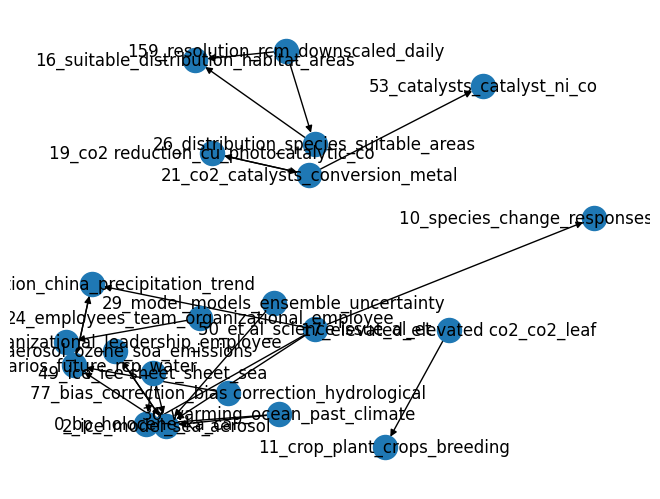

In [78]:
top_collabs = sorted(different_topic_counter.items(), key=lambda x: x[1], reverse=True)[:25]

G_top = nx.DiGraph()
for (c1, c2), weight in top_collabs:
    G_top.add_edge(c1, c2, weight=weight)

pos = nx.spring_layout(G_top, k=50, iterations=1000)
nx.draw(G_top, pos, with_labels=True)

In [32]:
set(out_tuples)

{('256_gpp_et_nee_terrestrial', '3_scenarios_future_rcp_water'),
 ('102_pco2_acidification_ph_growth', '50_et al_science issue_al_et'),
 ('206_o3_bc_aerosols_pm2', '206_o3_bc_aerosols_pm2'),
 ('4_farmers_adaptation_households_household',
  '96_health_diseases_disease_kidney'),
 ('304_species_abundance_richness_elevation',
  '92_species_models_sdms_predictions'),
 ('159_resolution_rcm_downscaled_daily', '0_bp_holocene_ka_cal'),
 ('100_research_bibliometric_publications_papers',
  '3_scenarios_future_rcp_water'),
 ('17_elevated_elevated co2_co2_leaf', '97_growth_radial growth_radial_tree'),
 ('119_urban_lcz_lczs_accuracy', '200_prediction_lstm_network_accuracy'),
 ('11_crop_plant_crops_breeding', '106_lulc_land_cover_land cover'),
 ('38_cultivars_fruit_genotypes_yield',
  '63_adaptation_development_resilience_local'),
 ('191_resolution_ocean_km_reanalyses', '8_pacific_anomalies_anomalous_sst'),
 ('15_fire_forest_tree_pine',
  '158_species_conservation_threatened_vulnerability'),
 ('188_o

In [31]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                        

In [80]:
greedy_modularity_communities(G_top)

[frozenset({'0_bp_holocene_ka_cal',
            '29_model_models_ensemble_uncertainty',
            '2_ice_model_sea_aerosol',
            '36_warming_ocean_past_climate',
            '39_aerosol_ozone_soa_emissions',
            '49_ice_ice sheet_sheet_sea'}),
 frozenset({'10_species_change_responses_climate change',
            '1_vegetation_china_precipitation_trend',
            '3_scenarios_future_rcp_water',
            '50_et al_science issue_al_et',
            '77_bias_correction_bias correction_hydrological'}),
 frozenset({'159_resolution_rcm_downscaled_daily',
            '16_suitable_distribution_habitat_areas',
            '26_distribution_species_suitable_areas'}),
 frozenset({'19_co2 reduction_cu_photocatalytic_co',
            '21_co2_catalysts_conversion_metal',
            '53_catalysts_catalyst_ni_co'}),
 frozenset({'13_employees_organizational_leadership_employee',
            '24_employees_team_organizational_employee'}),
 frozenset({'11_crop_plant_crops_breeding',

In [85]:
help(nx.clustering)

Help on _dispatch in module networkx.algorithms.cluster:

clustering = <networkx.utils.backends._dispatch object>
    Compute the clustering coefficient for nodes.

    For unweighted graphs, the clustering of a node :math:`u`
    is the fraction of possible triangles through that node that exist,

    .. math::

      c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},

    where :math:`T(u)` is the number of triangles through node :math:`u` and
    :math:`deg(u)` is the degree of :math:`u`.

    For weighted graphs, there are several ways to define clustering [1]_.
    the one used here is defined
    as the geometric average of the subgraph edge weights [2]_,

    .. math::

       c_u = \frac{1}{deg(u)(deg(u)-1))}
             \sum_{vw} (\hat{w}_{uv} \hat{w}_{uw} \hat{w}_{vw})^{1/3}.

    The edge weights :math:`\hat{w}_{uv}` are normalized by the maximum weight
    in the network :math:`\hat{w}_{uv} = w_{uv}/\max(w)`.

    The value of :math:`c_u` is assigned to 0 if :math:`deg(u) < 2`.

    A

In [84]:
nx.clustering(G_top)

{'0_bp_holocene_ka_cal': 0.3333333333333333,
 '2_ice_model_sea_aerosol': 0.08823529411764706,
 '24_employees_team_organizational_employee': 0,
 '13_employees_organizational_leadership_employee': 0,
 '1_vegetation_china_precipitation_trend': 0,
 '3_scenarios_future_rcp_water': 0,
 '26_distribution_species_suitable_areas': 0.5,
 '16_suitable_distribution_habitat_areas': 0.5,
 '49_ice_ice sheet_sheet_sea': 1.0,
 '50_et al_science issue_al_et': 0.16666666666666666,
 '39_aerosol_ozone_soa_emissions': 0,
 '19_co2 reduction_cu_photocatalytic_co': 0,
 '21_co2_catalysts_conversion_metal': 0,
 '10_species_change_responses_climate change': 0,
 '36_warming_ocean_past_climate': 1.0,
 '159_resolution_rcm_downscaled_daily': 0.5,
 '77_bias_correction_bias correction_hydrological': 0,
 '17_elevated_elevated co2_co2_leaf': 0,
 '11_crop_plant_crops_breeding': 0,
 '29_model_models_ensemble_uncertainty': 0,
 '53_catalysts_catalyst_ni_co': 0}

In [86]:
greedy_modularity_communities(G_dif)

[frozenset({'101_flood_slr_storm_flooding',
            '107_ci_95 ci_95_patients',
            '11_crop_plant_crops_breeding',
            '120_sensory_meat_storage_treatment',
            '126_moral_harm_responsibility_argue',
            '128_migration_shocks_countries_income',
            '132_research_valuers_originality_paper',
            '139_find_yields_production_corn',
            '13_employees_organizational_leadership_employee',
            '142_published accessed via_amendment paper_published accessed_paper published accessed',
            '144_urban_climate justice_justice_political',
            '145_health_children_climate change_change',
            '146_safety_safety climate_construction_workers',
            '149_agricultural_farmers_china_agricultural production',
            '14_safety_nurses_safety climate_care',
            '153_civil engineers_civil_engineers_institution civil engineers',
            '166_winter wheat_wheat_rice_yield',
            '167_05_kg_d